연습문제 2 풀이

iris 데이터 분류 - KNN(softmax로 한 경험 있음)

# 붗꽃(IRIS) 데이터 분류

세 붓꽃 종의 이름은 `Versicolor`, `Setosa`, `Virginica`이다.

각 종에 따라 꽃받침의 길이와 너비, 꽃잎의 길이와너비가 약간씩 차이가 난다.

이를 통해 KNN 분류를 진행.

## #01. 패키지

In [1]:
from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb

# 분류 알고리즘 관련 패키지
from sklearn.neighbors import KNeighborsClassifier

# 분류 결과 평가를 위한 패키지
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay
# # 경고 메시지 출력 방지
# import warnings
# warnings.filterwarnings("ignore")

## #02. 데이터

### 데이터 준비

In [2]:
origin = read_excel("https://data.hossam.kr/G02/iris.xlsx")
origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 데이터 전처리

#### 종속변수 종류 확인

In [5]:
origin['Species'].value_counts()
# origin['Species'].unique()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### 종속변수 라벨링

#### 라벨 정의

In [6]:
labels = {'setosa':0, "versicolor":1, "virginica":2}
labels

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

#### 결과 출력을 위한 라벨 역정의

In [7]:
classes = {0:'setosa', 1:"versicolor", 2:"virginica"}
classes

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

#### 라벨링

In [8]:
origin.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [10]:
df = origin.copy()
df['Species'] = df['Species'].map(labels)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 독립변수(feature), 종속변수(label) 분리

#### 독립변수(feature)

In [11]:
x = df.drop('Species', axis=1)
x.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 종속변수(label)

In [12]:
y = df['Species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

### 시각화를 통한 데이터 확인

#### case 1 : feature 2개만 사용

In [13]:
origin.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

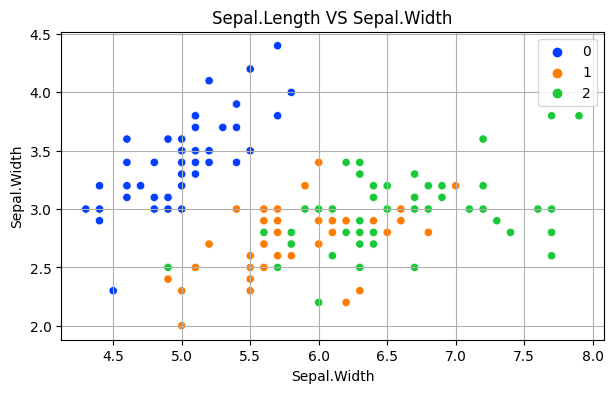

In [15]:
plt.figure(figsize=(7,4))

sb.scatterplot(data=df, x='Sepal.Length', y = 'Sepal.Width',
               hue = 'Species', palette='bright')

plt.xlabel('Sepal.Length')
plt.xlabel('Sepal.Width')
plt.title('Sepal.Length VS Sepal.Width')

plt.legend()
plt.grid()
plt.show()
plt.close()

#### case 2 : 산점도 행렬

c:\Users\jehyu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

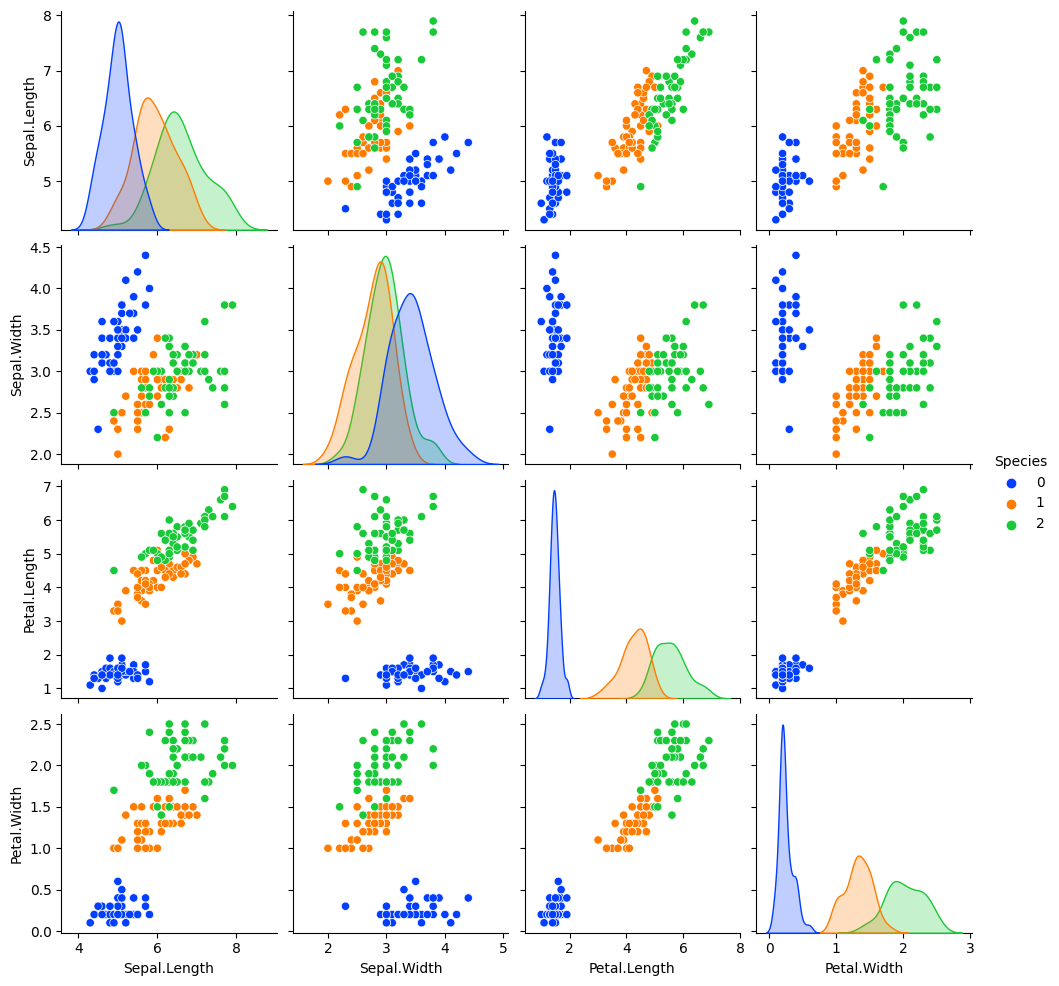

In [17]:
plt.figure(figsize=(15,10))

sb.pairplot(data=df, hue = 'Species', palette='bright')

plt.show()
plt.close()

## #03. KNN 분류모델 구성

train_test_split은 데이터를 학습/검증 모델로 나누는 만큼 선능 저하가 발생할 수 있음.

아래는 전체 데이터를 분석 모델로 만드는 만큼 성능이 더 좋음.

In [18]:
# 이웃의 수(K값은 개발자가 결정하는 `하이퍼 파라미터`)
k = 3
# 모델 정의(사용하려는 알고리즘 선택)
knn = KNeighborsClassifier(n_neighbors=k)
# 학습
knn.fit(x,y)
# 예측치 생성
y_pred = knn.predict(x)
# 측정값과 예측치를 DF로 생성
y_pred_df = DataFrame({"y":y.values, "y_pred":y_pred})  #y는 Series 객체
y_pred_df

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


## #04. 분류 결과 확인

### 새로운 데이터 투입

#### 새로운 분류 대상 정의

In [19]:
# new_data = [[5.2, 3.5, 1.5, 0.2], [6.2, 3.5, 5.4, 2.3]]
new_data = [[5.2, 3.5, 1.5, 0.2]]

#### 새로운 분류 대상에 대한 예측

In [21]:
new_data_pred = knn.predict(new_data)
# new_data_pred
print("데이터 : {0}, 예측 : {1}".format(new_data_pred[0], classes[new_data_pred[0]]))

데이터 : 0, 예측 : setosa


c:\Users\jehyu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 근접한 이웃의 거리와 인덱스

In [22]:
dist, index = knn.kneighbors(new_data)
print("거리 : {0}, 인덱스 : {1}".format(dist, index))

거리 : [[0.         0.14142136 0.14142136]], 인덱스 : [[27 28  0]]


c:\Users\jehyu\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


#### 근접한 이웃에 대한 실 데이터

##### 근접한 이웃 데이터를 numpy array로 추출
> 이전 실습 내용과 동일

In [24]:
df.values[index]

array([[[5.2, 3.5, 1.5, 0.2, 0. ],
        [5.2, 3.4, 1.4, 0.2, 0. ],
        [5.1, 3.5, 1.4, 0.2, 0. ]]])

##### 근접한 이웃 데이터를 DF로 추출

In [23]:
neighbors_data = df.iloc[index[0]]
neighbors_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
27,5.2,3.5,1.5,0.2,0
28,5.2,3.4,1.4,0.2,0
0,5.1,3.5,1.4,0.2,0


### 분류결과 시각화

In [26]:
# ?sb.scatterplot

In [33]:
# new_data[0][0]
# [new_data[0][0]]

[5.2]

In [ ]:
# neighbors_data

In [37]:
# 팔레트 색상 확인 (deep, muted, pastel, bright 등)
# sb.color_palette('bright')

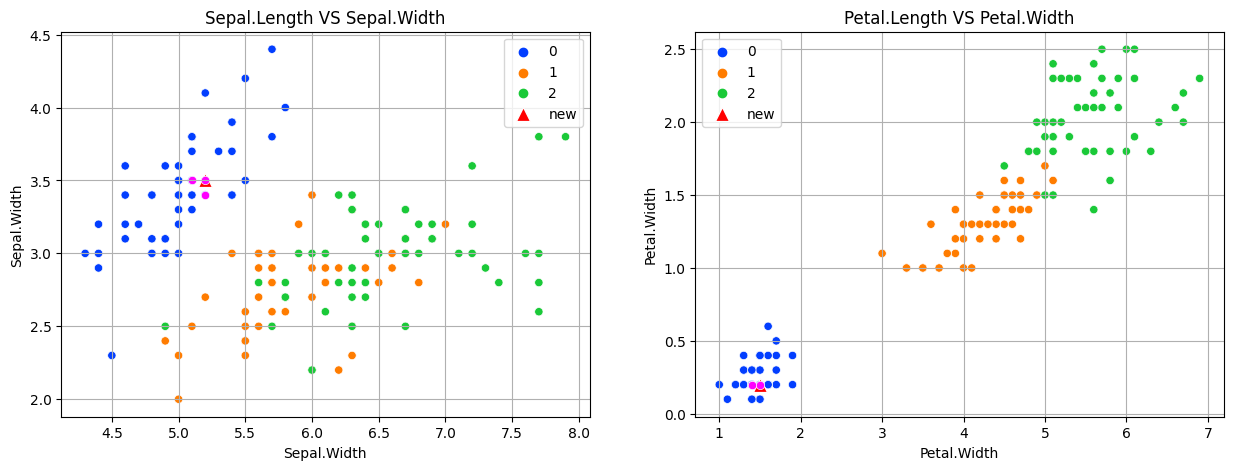

In [50]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,5))

# Sepal.Length VS Sepal.Width
sb.scatterplot(data=df, x='Sepal.Length', y = 'Sepal.Width',
               hue = 'Species', palette='bright', ax=ax1)
ax1.set_xlabel('Sepal.Length')
ax1.set_xlabel('Sepal.Width')
ax1.set_title('Sepal.Length VS Sepal.Width')
ax1.grid()

# pyplot에 바로 데이터를 입력해 seaborn과 호환이 안됨. label 추출 불가
# ax1.scatter(new_data[0][0], new_data[0][1], marker='^', s=100, c='r', label='new')

# 새로운 데이터 투입 (seaborn은 최소한 list 형태로 데이터를 입력)
sb.scatterplot(x=[new_data[0][0]], y=[new_data[0][1]], marker='^', 
           s=100, c='r', label='new', ax=ax1)

# 근접 이웃 표시 hue='Species'를 사용하면 c가 안되서 palette를 사용
sb.scatterplot(data=neighbors_data, x='Sepal.Length', y='Sepal.Width',
               c='#FF00FF', ax=ax1) 



# Petal.Length VS Petal.Width
sb.scatterplot(data=df, x='Petal.Length', y = 'Petal.Width',
               hue = 'Species', palette='bright', ax=ax2)
ax2.set_xlabel('Petal.Length')
ax2.set_xlabel('Petal.Width')
ax2.set_title('Petal.Length VS Petal.Width')
ax2.grid()

# 새로운 데이터 투입 (seaborn은 최소한 list 형태로 데이터를 입력)
sb.scatterplot(x=[new_data[0][2]], y=[new_data[0][3]], marker='^', 
           s=100, c='r', label='new', ax=ax2)

# 근접 이웃 표시 hue='Species'를 사용하면 c가 안되서 palette를 사용
sb.scatterplot(data=neighbors_data, x='Petal.Length', y='Petal.Width',
               c='#FF00FF', ax=ax2) 

plt.show()
plt.close()

## #05. 분류 성능 평가

사이킷런 패키지는 metrics 모듈에 다양한 선능 평가 방법을 제공.

이때 주의할 점은 이진 분류 여부를 잘 확인해 각각의 평가 지표를 적절하게 적용.

>로지스틱, 소프트맥스의 차이는 2진 분류

아래는 2진분류가 아니라도 범용적으로 사용이 가능
- 오차행렬(혼동행렬) : 'confusion_matrix(관측치, 예측치)'
- 정확도 : 'accuracy_score(관측치, 예측치)'

아래는 왠만해서는 binary 형태로 사용
- 정밀도 : 'precision_score(관측치, 예측치)'
- 재현율 : 'recall_score(관측치, 예측치)'
- F1 스코어 : 'f1_score(관측치, 예측치)'
- ROC 곡선 : 'roc_curve(관측치, 예측치)'
- 분류 리포트 : 'classification_report(관측치, 예측치)'
- AUC : 'roc_auc_score(관측치, 예측치)'

불균형한 레이블 클래스를 가지는 이진 분류 모델에서 정확도만 가지고 판단할 경우 신뢰도가 떨어질 수 있다. 이럴 경우 **정밀도 혹은 재현율**을 사용하는 것이 더욱 바람직.

- 정밀도 : 실제 음성인 데이터를 양성으로 판단하는 것이 더 큰 문제인 경우 사용.(ex: 스팸 메일 분류 모델)
- 재현율 : 실제 양성인 데이터를 음성으로 판단하는 것이 더 큰 문제인 경우 사용.(ex: 암 판단 모델)

### 혼동핼렬(오차행렬)

In [51]:
y_pred_df

,y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
145,2,2
146,2,2
147,2,2
148,2,2


In [52]:
conf_mat = confusion_matrix(y_pred_df['y'], y_pred_df['y_pred'])
conf_mat

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  3, 47]], dtype=int64)

### 혼동행렬 시각화

'conf_mat'을 활용해 직접 히트맵을 구현하기도 하지만 여기서는 sklearn의 'ConfusionMatrixDisplay' 클래스를 활용

In [55]:
classes.values()

dict_values(['setosa', 'versicolor', 'virginica'])

In [54]:
cls_labels = list(classes.values())
cls_labels

['setosa', 'versicolor', 'virginica']

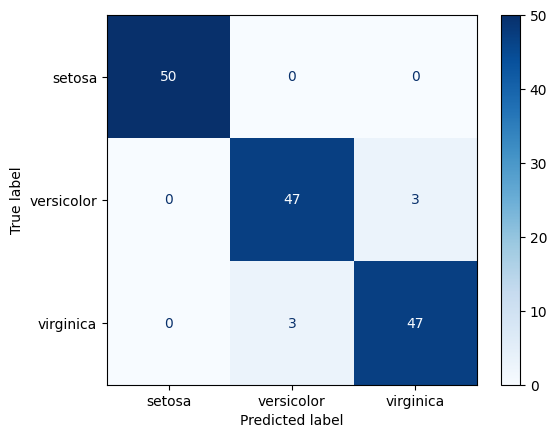

In [56]:
plot = ConfusionMatrixDisplay.from_predictions(
    y_pred_df['y'], #관측치(정답)
    y_pred_df['y_pred'],    #예측치
    display_labels=cls_labels,   #라벨
    cmap=plt.cm.Blues   #칼라맵 이름
)

### 정확도 판별

In [62]:
scores = accuracy_score(y_pred_df['y'], y_pred_df['y_pred'])
print("n_neighbors : {0}, 정확도 : {1:.2f}".format(k,scores))

n_neighbors : 3, 정확도 : 0.96


### 정밀도, 재현율, F 값

이 값들은 이진분류에서 사용을 권장. 그러므로 여기서는 실행 시 에러가 발생
>Target is multiclass but average='binary'

이진분류가 아닌 경우 다중분류에서는 'macro', 'micro', 'weighted' 방식을 사용 가능

average를 사용해 설정

In [65]:
scores = precision_score(y_pred_df['y'], y_pred_df['y_pred'], average='macro')
print("n_neighbors : {0}, 정밀도 : {1:.2f}".format(k,scores))

scores = recall_score(y_pred_df['y'], y_pred_df['y_pred'], average='macro')
print("n_neighbors : {0}, 재현율 : {1:.2f}".format(k,scores))

scores = f1_score(y_pred_df['y'], y_pred_df['y_pred'], average='macro')
print("n_neighbors : {0}, f값 : {1:.2f}".format(k,scores))

n_neighbors : 3, 정밀도 : 0.96
n_neighbors : 3, 재현율 : 0.96
n_neighbors : 3, f값 : 0.96


> k값에 따라 정확도, 정밀도 등이 달라짐. 즉, 이웃 값은 항시 다르기 때문에 다양하게 돌려보면서 확인해야함.